# 1-Dimensional Window Extraction
window : 10개의 원소를 가진 1차원 벡터가 주어졌을 때, 3칸(홀수개)의 window가 차례대로 지나가면서 데이터를 3개씩 뽑는 과정<br>
L' = L - W + 1<br>
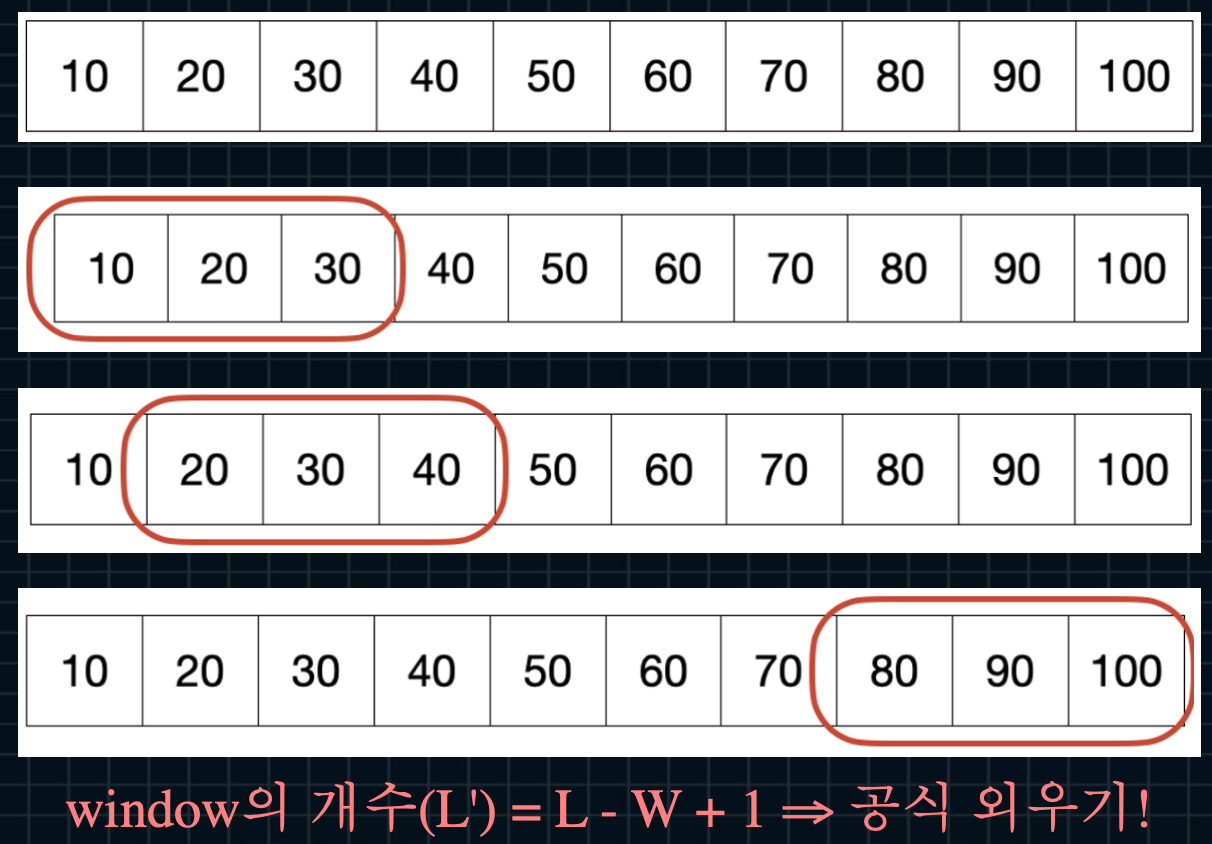

In [1]:
import numpy as np

data = 10 * np.arange(1, 11)
L = len(data)
W = 3
print(f'{data}\n')

L_ = L - W +1
for idx in range(L_):
    print(data[idx : idx + W])

[ 10  20  30  40  50  60  70  80  90 100]

[10 20 30]
[20 30 40]
[30 40 50]
[40 50 60]
[50 60 70]
[60 70 80]
[70 80 90]
[ 80  90 100]


In [5]:
# 2-Dimensional Window Extraction
import numpy as np

data1 = 10 * np.arange(1, 8).reshape(1, -1)
data2 = 10 * np.arange(5).reshape(-1, 1)

data = data1 + data2
print(data)
print()
H, W = data.shape
F = 3 # 임시적으로 window size 정의
H_ = H - F + 1
W_ = W - F + 1

for h_idx in range(H_):
    for w_idx in range(W_):
        print(data[h_idx:h_idx + F, w_idx:w_idx + F])
        print()

[[ 10  20  30  40  50  60  70]
 [ 20  30  40  50  60  70  80]
 [ 30  40  50  60  70  80  90]
 [ 40  50  60  70  80  90 100]
 [ 50  60  70  80  90 100 110]]

[[10 20 30]
 [20 30 40]
 [30 40 50]]

[[20 30 40]
 [30 40 50]
 [40 50 60]]

[[30 40 50]
 [40 50 60]
 [50 60 70]]

[[40 50 60]
 [50 60 70]
 [60 70 80]]

[[50 60 70]
 [60 70 80]
 [70 80 90]]

[[20 30 40]
 [30 40 50]
 [40 50 60]]

[[30 40 50]
 [40 50 60]
 [50 60 70]]

[[40 50 60]
 [50 60 70]
 [60 70 80]]

[[50 60 70]
 [60 70 80]
 [70 80 90]]

[[ 60  70  80]
 [ 70  80  90]
 [ 80  90 100]]

[[30 40 50]
 [40 50 60]
 [50 60 70]]

[[40 50 60]
 [50 60 70]
 [60 70 80]]

[[50 60 70]
 [60 70 80]
 [70 80 90]]

[[ 60  70  80]
 [ 70  80  90]
 [ 80  90 100]]

[[ 70  80  90]
 [ 80  90 100]
 [ 90 100 110]]



In [7]:
# 1-D Correlation
import numpy as np
np.random.seed(0)

data = np.random.randint(-1, 2, (10, ))
filter_ = np.array([-1, 1, -1])
print(f'{data = }')
print(f'{filter_ = }')

L = len(data)
F = len(filter_)

L_ = L - F +1
filtered = []
for idx in range(L_):
    window = data[idx:idx + F]
    filtered.append(np.dot(window, filter_))

filtered = np.array(filtered)
print(f'filtering result: {filtered}')

data = array([-1,  0, -1,  0,  0,  1, -1,  1, -1, -1])
filter_ = array([-1,  1, -1])
filtering result: [ 2 -1  1 -1  2 -3  3 -1]


In [2]:
# 2-Dimensional Window Extraction
import numpy as np

data1 = 10 * np.arange(1, 8).reshape(1, -1)
data2 = 10 * np.arange(5).reshape(-1, 1)

data = data1 + data2
print(data,' \n')
filter_ = np.array([[1, 2, 5], 
                    [-10, 2, -2], 
                    [5, 1, -4]])

H, W = data.shape
F_h, F_w = filter_.shape
H_ = H - F_h + 1
W_ = W - F_w + 1

filtered = np.zeros(shape=(H_, W_))
for h_idx in range(H_):
    for w_idx in range(W_):
        window = np.array(data[h_idx:h_idx + F_h, w_idx:w_idx + F_w])
        z = np.sum(window * filter_)
        filtered[h_idx, w_idx] = z

print(f'filtering result: {filtered.shape}\n{filtered}')

[[ 10  20  30  40  50  60  70]
 [ 20  30  40  50  60  70  80]
 [ 30  40  50  60  70  80  90]
 [ 40  50  60  70  80  90 100]
 [ 50  60  70  80  90 100 110]]  

filtering result: (3, 5)
[[-30. -30. -30. -30. -30.]
 [-30. -30. -30. -30. -30.]
 [-30. -30. -30. -30. -30.]]


In [4]:
# 1-D Correlation
import numpy as np
np.random.seed(0)

data = np.random.randint(-1, 2, (10, ))
filter_ = np.array([-1, 1, -1])

L = len(data)
F = len(filter_)
L_ = L - F +1

# broadcasted = data.reshape(-1, 1) * filter_.reshape(1, -1)
# filtered = np.sum((broadcasted[:-2,0], broadcasted[1:-1,1], broadcasted[2:,2]), axis=0) # 기하학?적 접근법

# 인덱스 어레이
filter_idx = np.arange(F).reshape(1, -1)
window_idx = np.arange(L_).reshape(-1, 1)
idx_arr = filter_idx + window_idx
window_mat = data[idx_arr]

# 행렬의 곱셈을 이용하기 위해서 filter_를 (3, 1)로 바꿔줄 필요가 있음
correlations = np.matmul(window_mat, filter_.reshape(-1, 1))

# 만약 결과를 vector처럼 다뤄야 하면
correlations = correlations.flatten()
print(f"{correlations = }")

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]
correlations = array([ 2, -1,  1, -1,  2, -3,  3, -1])
